# Neural Networks In Depth: Homework
Hello, welcome to the first homework of the deep learning unit! 
In this homework you will build a neural network **from scratch** to classify hand written digits. To train our mode, we will use the digits dataset from scikit-learn, you can find some information about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).
### Few hints:
- Start by preparing your dataset. (Flatten the images as a first step...)
- Implement the forward and backward passes functions, a function to initialize the parameters, the training loop...
- Measure the accuracy of your model. 
- If the accuracy of your model is not good enough, there many things you can change. For example: the number of layers in your neural network, the number of neurons your layers, the initialization method, the number of epochs, the learning rate...

### Starter code:
Below you will find a starter code, we load the dataset for you and display an example of each digit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as datasets

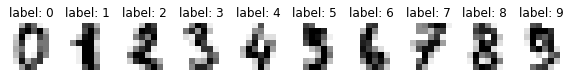

In [2]:
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('label: %i' % label)

In [3]:
############# END OF STARTER CODE ##################################""

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def initializeParameters(inputSize, hiddenLayerSize, outputSize):
    W1 = np.random.randn(hiddenLayerSize, inputSize) * 0.01
    W2 = np.random.randn(outputSize, hiddenLayerSize) * 0.01
    b1 = np.zeros((hiddenLayerSize, 1))
    b2 = np.zeros((outputSize, 1))
    
    # We store our parameters in a dict and return them
    parameters = {"W1" : W1, "b1": b1, "W2" : W2, "b2": b2}
    return parameters

In [7]:
def forwardPropagation(X, parameters, Y=None, predict=False):
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    # If we want just to predict the class, then there is no need to calculate the cost.
    if predict:
        return A2
    else:
        cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
        logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
        cost = -1/Y.shape[1]*np.sum(logprobs)
        return cost, cache, A2

In [8]:
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

In [9]:
# Updating the parameters
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

In [10]:
# flatten the images: from 8*8 to 64*1 so we can feed them to our NN.
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
Y = digits.target.reshape((n_samples, 1))
# One-hot encoding the labels because it is a multinomial classification (We have 10 classes)
enc = OneHotEncoder()
Y = enc.fit_transform(Y).toarray()
X.shape, Y.shape

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


((1797, 64), (1797, 10))

In [11]:
# Splitting the data into a train test (90%) and a test set (10%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T
X_train.shape, y_train.shape

((64, 1617), (10, 1617))

In [12]:
# Defining the size of the only hidden layer we have and both the input and output sizes
hiddenLayerSize = 128 
inputSize = X_train.shape[0] 
outputSize = y_train.shape[0] 

In [13]:
# Training loop
parameters = initializeParameters(inputSize, hiddenLayerSize, outputSize)
epoch = 10000
learningRate = 0.01
losses = np.zeros((epoch, 1))
accuracies = np.zeros((epoch, 1))

for i in range(epoch):
    # Forward pass -> backward pass -> update parameters.
    losses[i, 0], cache, A2 = forwardPropagation(X_train, parameters, Y=y_train, predict=False)
    gradients = backwardPropagation(X_train, y_train, cache)
    parameters = updateParameters(parameters, gradients, learningRate)
    # Measuring accuracy.
    _, _, A2 = forwardPropagation(X_test, parameters, Y=y_test, predict=False )
    y_test_classes = y_test.T.argmax(1)
    y_pred_classes = A2.T.argmax(1)
    accuracies[i, 0] = accuracy_score(y_test_classes, y_pred_classes)
    # Printing the loss each 1000 iteration
    if i%1000 == 0:
        print("Loss = ", losses[i,0])

Loss =  6.876512850190109
Loss =  1.0102492079357355
Loss =  0.4873052065821186
Loss =  0.3291552419462445
Loss =  0.25225081933528004
Loss =  0.20547865869227255
Loss =  0.1733601356302187
Loss =  0.1496151407747315
Loss =  0.13117269473217721
Loss =  0.11634959206362631


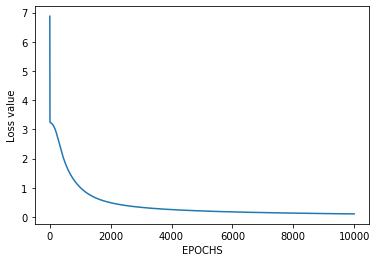

In [14]:
# Plot the losses graph
from matplotlib import pyplot as plt
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

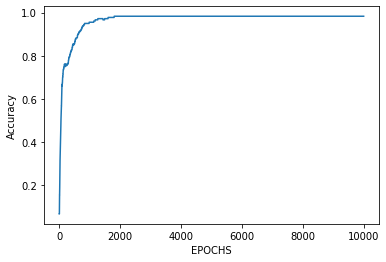

In [15]:
# Plot the accuracies graph
from matplotlib import pyplot as plt
plt.figure()
plt.plot(accuracies)
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.show()

In [16]:
# Predict one image
X_image = X_test[:,28].reshape(X_test.shape[0],1)
y_image = y_test[:,28].reshape(y_test.shape[0],1)
predicted = forwardPropagation(X_image, parameters, predict = True)
y_image = y_image.T.argmax(1)
predicted = predicted.T.argmax(1)
print(" True= ", y_image, "Predicted= ", predicted)

 True=  [8] Predicted=  [8]
